In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn import model_selection
from sklearn import ensemble

plt.style.use('seaborn-v0_8')
%matplotlib inline

In [2]:
shoppers_data = pd.read_csv('data/online_shoppers_intention.csv')
shoppers_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
print(shoppers_data.shape)

(12330, 18)


In [4]:
shoppers_data.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [5]:
dummy_data = pd.get_dummies(shoppers_data)
dummy_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True


Sessions without purchase: 84.53%
Sessions with purchase: 15.47%


/var/folders/_0/y2tqd6y16qgd2588d26m1hq40000gn/T/ipykernel_38687/3676222792.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Revenue', data=dummy_data, palette='CMRmap')
/var/folders/_0/y2tqd6y16qgd2588d26m1hq40000gn/T/ipykernel_38687/3676222792.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Sessions without purchase: {:.2f}%'.format(class_percent[0]))
/var/folders/_0/y2tqd6y16qgd2588d26m1hq40000gn/T/ipykernel_38687/3676222792.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by po

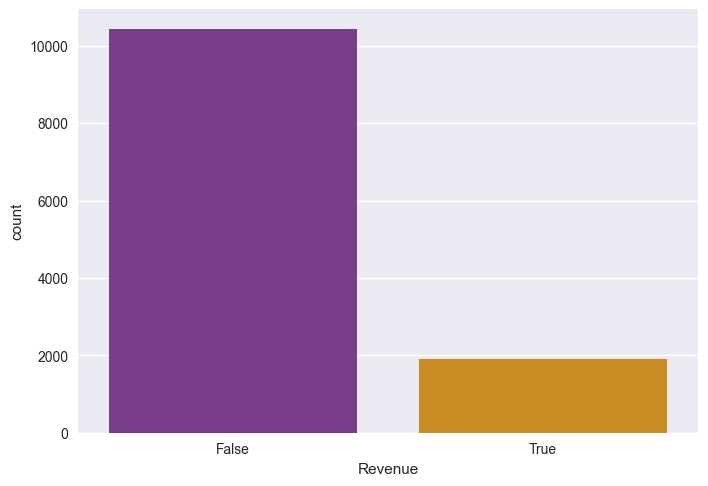

In [6]:
sns.countplot(x='Revenue', data=dummy_data, palette='CMRmap')
class_percent = dummy_data['Revenue'].value_counts(normalize=True) * 100
print('Sessions without purchase: {:.2f}%'.format(class_percent[0]))
print('Sessions with purchase: {:.2f}%'.format(class_percent[1]))
plt.show()

In [7]:
X, y = dummy_data.drop('Revenue', axis=1), dummy_data['Revenue']

In [8]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
print('Train size: {}'.format(X_train.shape))
print('Valid size: {}'.format(X_valid.shape))

Train size: (9864, 28)
Valid size: (2466, 28)


In [9]:
model = ensemble.RandomForestClassifier(
    random_state=42
)
skf = model_selection.StratifiedKFold(n_splits=5)
cv_metrics = model_selection.cross_validate(
    estimator=model,
    X=X_train,
    y=y_train,
    cv=skf,
    scoring='f1',
    return_train_score=True
)
print('Train k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['test_score'])))

Train k-fold mean f1: 1.00
Valid k-fold mean f1: 0.65


In [10]:
def plot_learning_curve(model, X, y, cv, scoring="f1", ax=None, title=""):
    # Вычисляем координаты для построения кривой обучения
    train_sizes, train_scores, valid_scores = model_selection.learning_curve(
        estimator=model,  # модель
        X=X,  # матрица наблюдений X
        y=y,  # вектор ответов y
        cv=cv,  # кросс-валидатор
        scoring=scoring,  # метрика
    )
    # Вычисляем среднее значение по фолдам для каждого набора данных
    train_scores_mean = np.mean(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    # Если координатной плоскости не было передано, создаём новую
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 4))  # фигура + координатная плоскость
    # Строим кривую обучения по метрикам на тренировочных фолдах
    ax.plot(train_sizes, train_scores_mean, label="Train")
    # Строим кривую обучения по метрикам на валидационных фолдах
    ax.plot(train_sizes, valid_scores_mean, label="Valid")
    # Даём название графику и подписи осям
    ax.set_title("Learning curve: {}".format(title))
    ax.set_xlabel("Train data size")
    ax.set_ylabel("Score")
    # Устанавливаем отметки по оси абсцисс
    ax.xaxis.set_ticks(train_sizes)
    # Устанавливаем диапазон оси ординат
    ax.set_ylim(0, 1)
    # Отображаем легенду
    ax.legend()
    plt.show()

In [11]:
models = [
    ensemble.RandomForestClassifier(
        max_depth=5,
        n_estimators=200,
        min_samples_leaf=5,
        random_state=42,
        class_weight='balanced'
    ),
    ensemble.RandomForestClassifier(
        max_depth=7,
        n_estimators=200,
        min_samples_leaf=5,
        random_state=42,
        class_weight='balanced'
    ),
    ensemble.RandomForestClassifier(
        max_depth=12,
        n_estimators=200,
        min_samples_leaf=5,
        random_state=42,
        class_weight='balanced'
    )
]

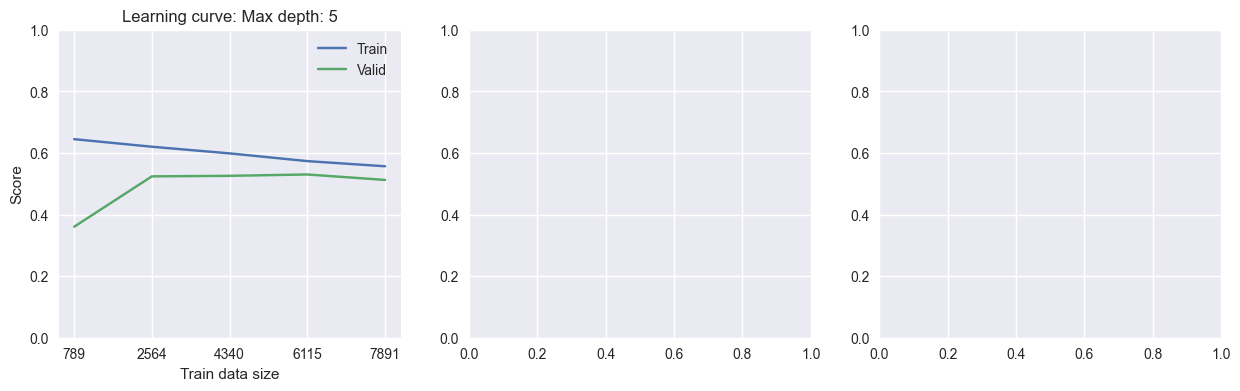

In [12]:
skf = model_selection.StratifiedKFold(n_splits=5)
depths = [5, 7, 12]
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, depth in enumerate(depths):
    model = ensemble.RandomForestClassifier(
        n_estimators=200,
        max_depth=depth,
        min_samples_leaf=5,
        random_state=42
    )
    plot_learning_curve(model, X_train, y_train, skf, ax=axes[i], title=f'Max depth: {depth}')
    plt.show()

In [13]:
model = ensemble.RandomForestClassifier(
    n_estimators=200,
    max_depth=7,
    min_samples_leaf=5,
    random_state=42
)
skf = model_selection.StratifiedKFold(n_splits=5)
train_sizes, train_scores, valid_scores = model_selection.learning_curve(
    estimator=model,
    X=X,
    y=y,
    cv=skf,
    scoring='f1'
)
model.fit(X_train, y_train)
y_valid_pred = model.predict(X_valid)
print(metrics.classification_report(y_valid, y_valid_pred))

/Users/josepborel/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/josepborel/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/josepborel/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Users/josepborel/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
  File "/Users/josepborel/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/Users/josepborel/Libra

              precision    recall  f1-score   support

       False       0.91      0.98      0.94      2084
        True       0.79      0.49      0.60       382

    accuracy                           0.90      2466
   macro avg       0.85      0.73      0.77      2466
weighted avg       0.89      0.90      0.89      2466



Best thresholds = 0.36, F1-Score = 0.69


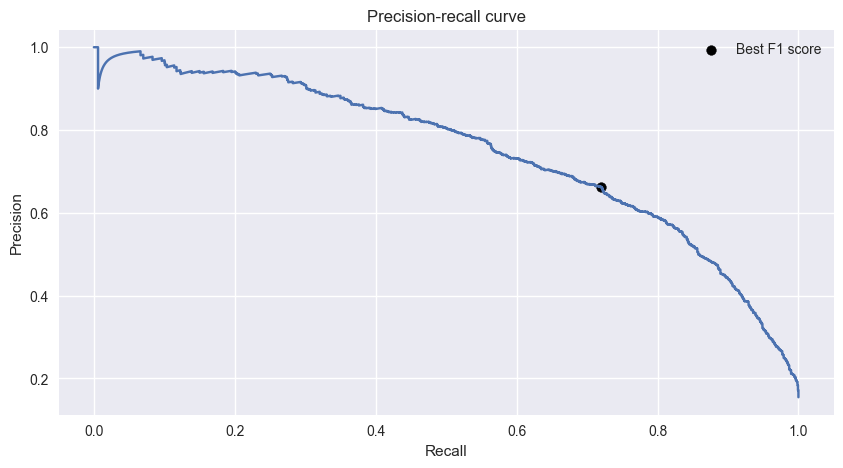

In [14]:
model = ensemble.RandomForestClassifier(
    n_estimators=200,
    max_depth=7,
    min_samples_leaf=5,
    random_state=42
)
model.fit(X_train, y_train)
skf = model_selection.StratifiedKFold(n_splits=5)
y_cv_proba_pred = model_selection.cross_val_predict(model, X_train, y_train, cv=skf, method='predict_proba')
y_cv_proba_pred = y_cv_proba_pred[:, 1]
precision, recall, thresholds = metrics.precision_recall_curve(y_train, y_cv_proba_pred)
f1_scores = (2 * precision * recall) / (precision + recall)
idx = np.argmax(f1_scores)
print('Best thresholds = {:.2f}, F1-Score = {:.2f}'.format(thresholds[idx], f1_scores[idx]))

fog, ax = plt.subplots(figsize=(10, 5))
ax.plot(recall, precision)
ax.scatter(recall[idx], precision[idx], marker='o', color='black', label='Best F1 score')
ax.set_title('Precision-recall curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend()
plt.show()


In [16]:
threshold_opt = 0.36
y_test_pred_proba = model.predict_proba(X_valid)[:, 1]
y_valid_pred = (y_test_pred_proba > threshold_opt).astype('int')
print(metrics.classification_report(y_valid, y_valid_pred))

              precision    recall  f1-score   support

       False       0.94      0.93      0.94      2084
        True       0.66      0.69      0.67       382

    accuracy                           0.90      2466
   macro avg       0.80      0.81      0.81      2466
weighted avg       0.90      0.90      0.90      2466

